### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Ridge Regression

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("F:\CLASS\CSE498R(Directed Research)\Dataset\RajshahiNew\CombineRajshahiDataset.csv")

In [5]:
data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,24.50,14.00,1011.80,81.00,5.60,3.30,5.40,285.0,VU
1,2,14.2,18.40,11.40,1012.10,88.00,4.30,5.00,7.60,285.0,VU
2,3,14.8,23.60,10.60,1012.80,71.00,5.00,4.10,7.60,391.0,EU
3,4,14.9,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,261.0,VU
4,5,14.9,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,219.0,VU


In [6]:
data.shape

(1007, 11)

In [7]:
data = data.drop(['D'], axis = 1)
data

,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,18.40,24.50,14.00,1011.80,81.00,5.60,3.30,5.40,285.0,VU
1,14.20,18.40,11.40,1012.10,88.00,4.30,5.00,7.60,285.0,VU
2,14.80,23.60,10.60,1012.80,71.00,5.00,4.10,7.60,391.0,EU
3,14.90,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,261.0,VU
4,14.90,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,219.0,VU
...,...,...,...,...,...,...,...,...,...,...
1002,14.80,24.00,7.80,1013.60,75.00,5.30,1.30,5.40,295.0,VU
1003,18.16,25.42,12.77,1014.86,78.31,4.89,1.95,5.29,333.0,EU
1004,18.16,25.42,12.77,1014.86,78.31,4.89,1.95,5.29,397.0,EU
1005,18.16,25.42,12.77,1014.86,78.31,4.89,1.95,5.29,288.0,VU


In [8]:
data.isnull().sum()

T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

<AxesSubplot:>

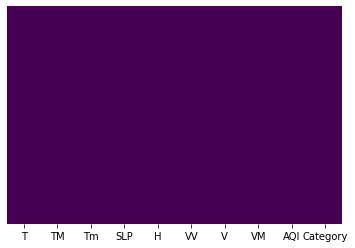

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Categorical Value Handling - (Label Encoding Method)

In [10]:
data['Category'].unique()

array(['VU', 'EU', 'C', 'U', 'M', 'G'], dtype=object)

# Import Label Encoder 

In [11]:
from sklearn import preprocessing 

In [12]:
encode = preprocessing.LabelEncoder()
data['Category'] = encode.fit_transform(data['Category'])

In [13]:
data['Category'].unique()

array([5, 1, 0, 4, 3, 2])

In [14]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,18.4,24.50,14.00,1011.80,81.00,5.60,3.30,5.40,285.0,5
1,14.2,18.40,11.40,1012.10,88.00,4.30,5.00,7.60,285.0,5
2,14.8,23.60,10.60,1012.80,71.00,5.00,4.10,7.60,391.0,1
3,14.9,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,261.0,5
4,14.9,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,219.0,5


# Correalation Matrix

In [15]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
T,1.000000,0.953209,0.972471,-0.866961,0.188052,0.683842,0.364101,0.145800,-0.792248,-0.363730
TM,0.953209,1.000000,0.882336,-0.780737,-0.019022,0.753939,0.262301,0.097976,-0.699872,-0.326720
Tm,0.972471,0.882336,1.000000,-0.887879,0.377996,0.594192,0.382684,0.140092,-0.823161,-0.364181
SLP,-0.866961,-0.780737,-0.887879,1.000000,-0.351717,-0.540844,-0.515137,-0.257461,0.740784,0.318082
H,0.188052,-0.019022,0.377996,-0.351717,1.000000,-0.233558,0.115707,-0.041456,-0.344199,-0.092180
VV,0.683842,0.753939,0.594192,-0.540844,-0.233558,1.000000,0.217333,0.071609,-0.508204,-0.291137
V,0.364101,0.262301,0.382684,-0.515137,0.115707,0.217333,1.000000,0.824576,-0.442283,-0.170079
VM,0.145800,0.097976,0.140092,-0.257461,-0.041456,0.071609,0.824576,1.000000,-0.220798,-0.074926
AQI,-0.792248,-0.699872,-0.823161,0.740784,-0.344199,-0.508204,-0.442283,-0.220798,1.000000,0.288231
Category,-0.363730,-0.326720,-0.364181,0.318082,-0.092180,-0.291137,-0.170079,-0.074926,0.288231,1.000000


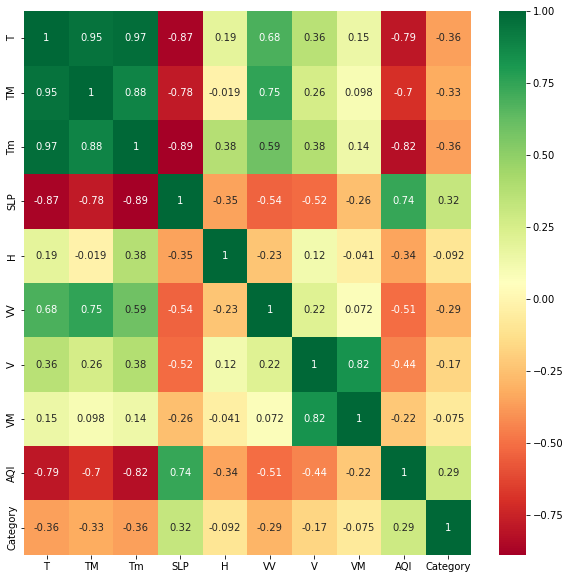

In [16]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
X = data.iloc[:,:-2] ##independent features
y = data.iloc[:,-2]  ##dependent features

In [18]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,18.4,24.50,14.00,1011.80,81.00,5.60,3.30,5.40
1,14.2,18.40,11.40,1012.10,88.00,4.30,5.00,7.60
2,14.8,23.60,10.60,1012.80,71.00,5.00,4.10,7.60
3,14.9,22.29,9.65,1013.11,80.82,4.94,2.74,5.85
4,14.9,22.29,9.65,1013.11,80.82,4.94,2.74,5.85


In [19]:
y.head()

0    285.0
1    285.0
2    391.0
3    261.0
4    219.0
Name: AQI, dtype: float64

In [20]:
y.isnull().sum()

0

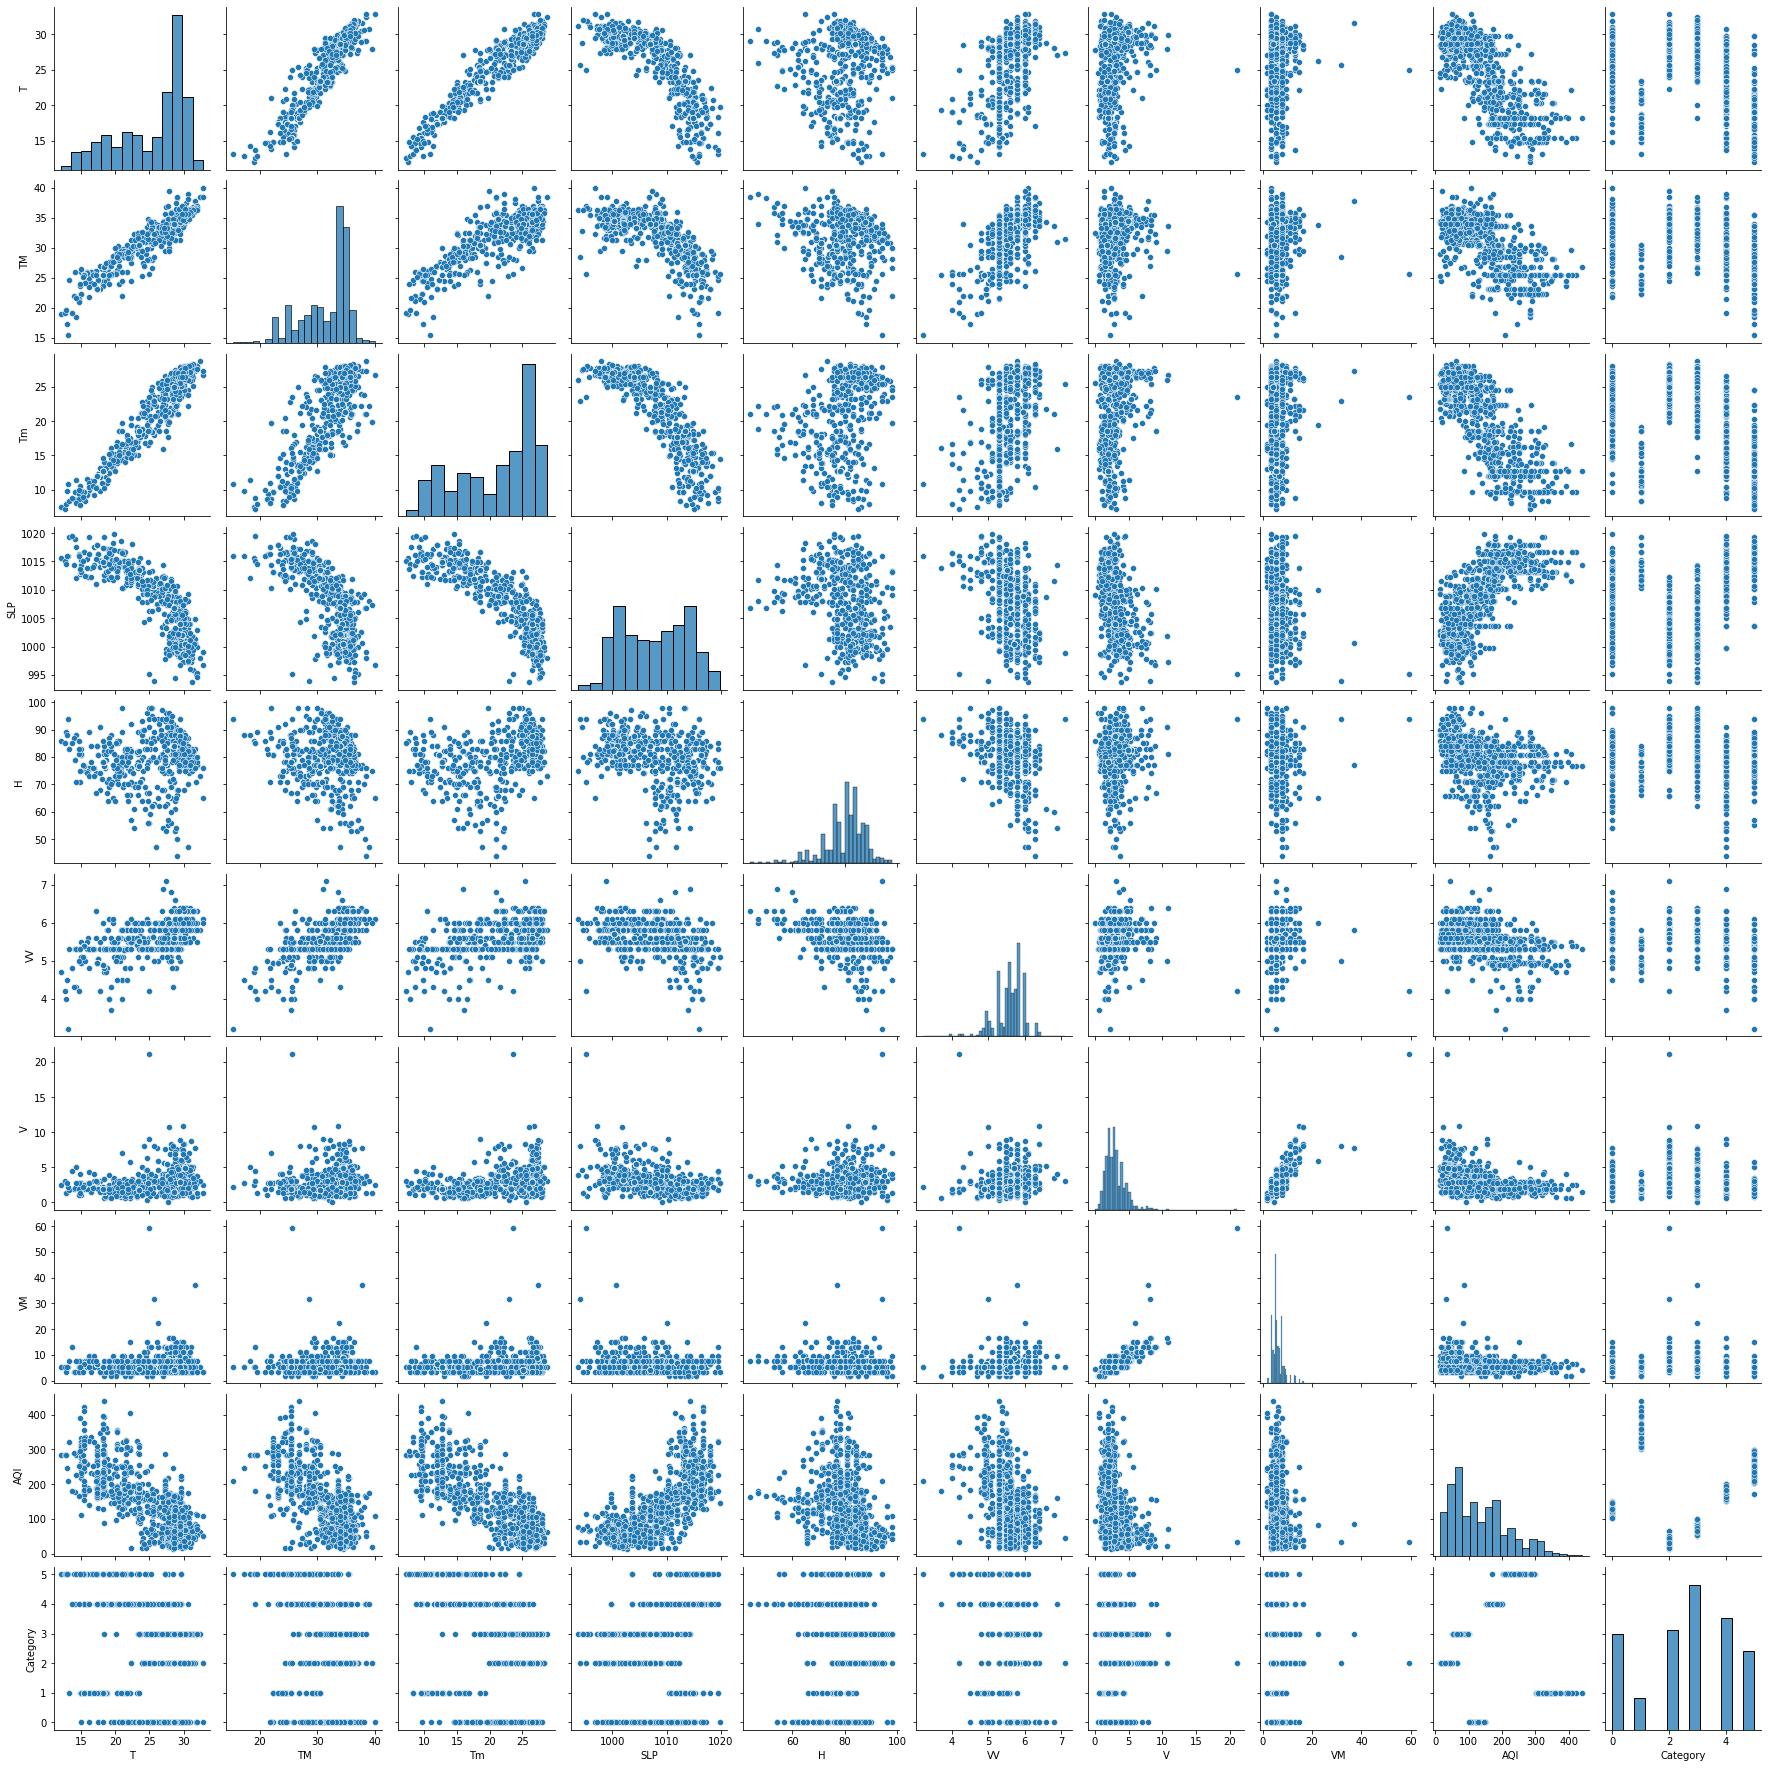

In [21]:
sns.pairplot(data)

# Feature Importance

We are using Extra Tree Regressor to find out top features from dataset.

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

In [23]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.21834277 0.0625901  0.42353363 0.1786778  0.03787152 0.02757504
 0.02872753 0.02268161]


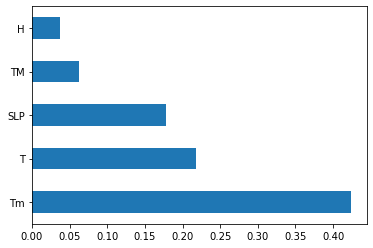

In [25]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

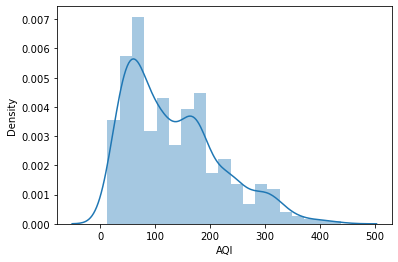

In [26]:
sns.distplot(y,kde=True)

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#  M-1: Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
round(lr.score(X_train,y_train)*100,2)

71.36

In [31]:
round(lr.score(X_test,y_test)*100,2)

68.09

# Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,X_train,y_train,cv=5)
round(score.mean()*100,2)

70.27

# Model Evaluation

In [33]:
prediction = lr.predict(X_test)

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

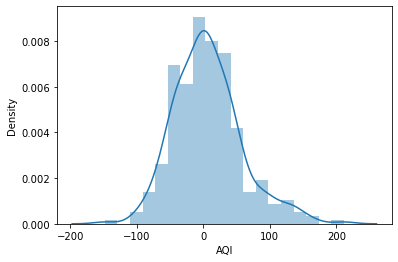

In [34]:
sns.distplot(y_test-prediction,kde=True)

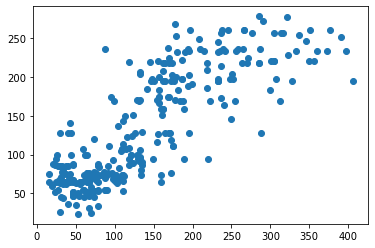

In [35]:
plt.scatter(y_test,prediction)

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 38.60399195719111
MSE: 2655.7567623955783
RMSE: 51.534034990436936


# M-2: Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [39]:
lasso = Lasso()

In [40]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,30,35,40]}
lasso_regression=GridSearchCV(lasso,parameters,cv=5)
lasso_regression.fit(X_train,y_train)

C:\Users\Rutton\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.328e+05, tolerance: 3.757e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rutton\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.427e+05, tolerance: 3.853e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rutton\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.615e+05, toler

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 30, 35, 40]})

In [41]:
print(lasso_regression.best_params_)

{'alpha': 1e-15}


In [42]:
round(lasso_regression.best_score_*100,2)

70.27

# Model Evaluation

In [43]:
prediction = lasso_regression.predict(X_test)

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

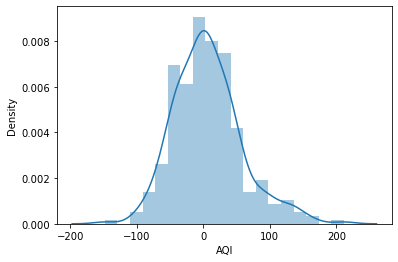

In [44]:
sns.distplot(y_test-prediction,kde=True)

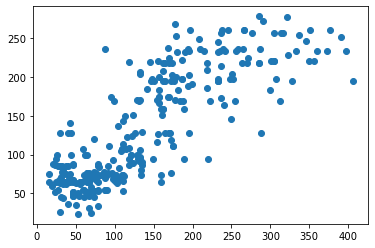

In [45]:
plt.scatter(y_test,prediction)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 38.60399313816495
MSE: 2655.7568525985635
RMSE: 51.534035865615685


# M-3: Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [48]:
ridge = Ridge()

In [49]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,30,35,40]}
ridge_regression=GridSearchCV(ridge,parameters,cv=5)
ridge_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 30, 35, 40]})

In [50]:
print(ridge_regression.best_params_)

{'alpha': 5}


In [51]:
round(ridge_regression.best_score_*100,2)

70.27

# Model Evaluation

In [52]:
prediction = ridge_regression.predict(X_test)

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 38.620426221601505
MSE: 2659.7962370476803
RMSE: 51.57321239798507
